# 586 Midterm 
### Shannon Dow

## Problem 2: 

In [1]:
using Plots, LaTeXStrings, LinearAlgebra

### Forward Euler
with N = 6 and $b_j(0) = 0$ and $a_j(0) = \frac{1}{2} $ 

In [2]:
N = 6
k = 0.01
n = convert(Int64,100/k)
t = zeros(n+1)
t[1]=0
b = zeros(N, n+1);
a = zeros(N-1, n+1);
b[:,1] = zeros(N);
a[:,1] = 0.5*ones(N-1);
T = SymTridiagonal(b[:,1],a[:,1])
eigs,evecs = eigen(T)

for i = 2:n+1
    S = Tridiagonal(-a[:,i-1],zeros(N),a[:,i-1])
    f = T -> (S*T)-(T*S);
    T = T + k*f(T)
    b[:,i] = diag(T)
    a[:,i] = diag(T,1)
    t[i] = t[i-1] + k
    
end

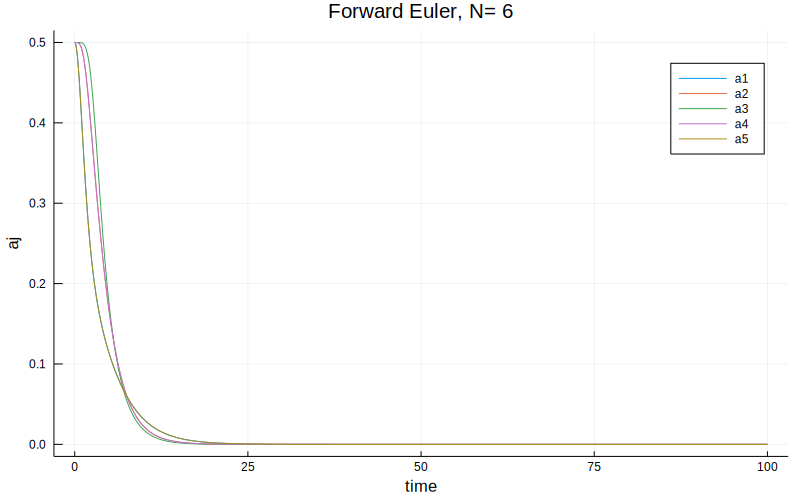

In [3]:
plot(t,a[1,:],label = "a1")
for i = 2:N-2
    nam = string("a",string(i))
    plot!(t,a[i,:],label = nam)
end
nam = string("a",string(N-1))
xlabel!("time")
ylabel!("aj")
title!(string("Forward Euler, N= ",string(N)))
display(plot!(t,a[N-1,:],label = nam,size = (800, 500)))


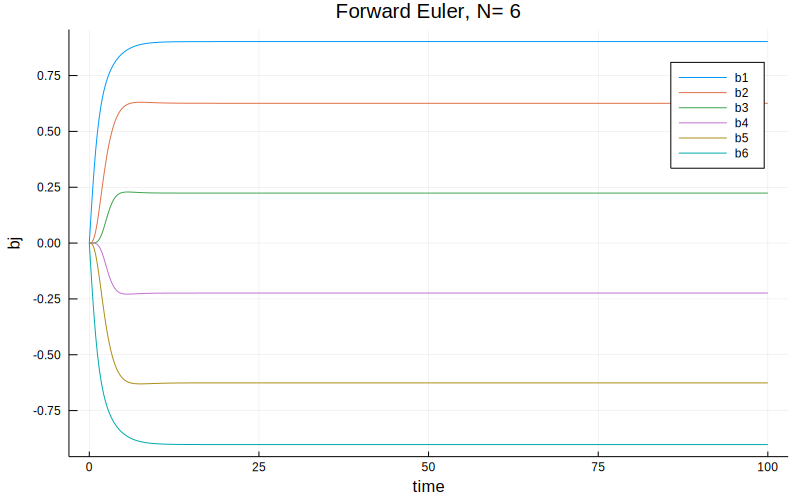

In [4]:
plot(t,b[1,:],label = "b1")
for i = 2:N-1
    nam = string("b",string(i))
    plot!(t,b[i,:],label = nam)
end
nam = string("b",string(N))
xlabel!("time")
ylabel!("bj")
title!(string("Forward Euler, N= ",string(N)))
display(plot!(t,b[N,:],label = nam,size = (800, 500)))


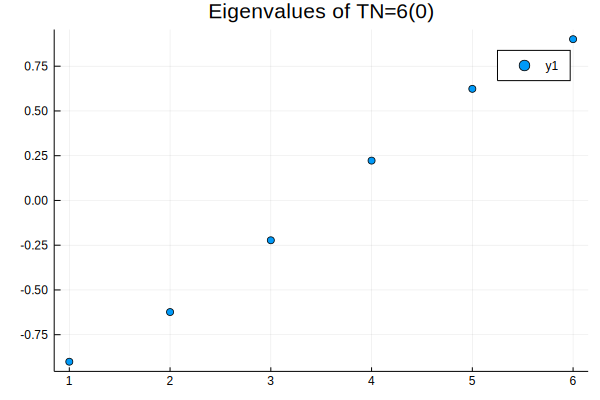

In [21]:
scatter(eigs)
title!("Eigenvalues of TN=6(0)")

### Forward Euler
with N = 12 and $b_j(0) = -2$ and $a_j(0) = 1 $ 

In [23]:
N = 12
k = 0.01
n = convert(Int64,100/k)
t = zeros(n+1)
t[1]=0
b = zeros(N, n+1);
a = zeros(N-1, n+1);
b[:,1] = -2*ones(N);
a[:,1] = ones(N-1);
T = SymTridiagonal(b[:,1],a[:,1])
eigs,evecs = eigen(T)
for i = 2:n+1
    S = Tridiagonal(-a[:,i-1],zeros(N),a[:,i-1])
    f = T -> S*T-T*S;
    T = T + k*f(T)
    b[:,i] = diag(T)
    a[:,i] = diag(T,1)
    t[i] = t[i-1] + k
end

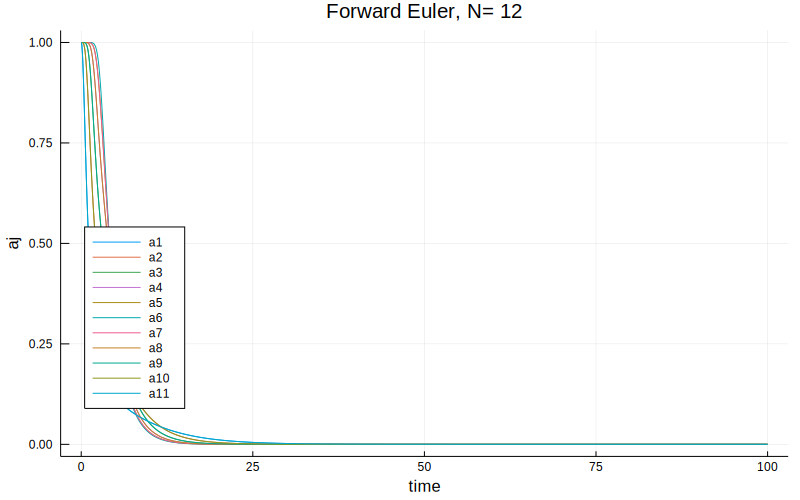

In [7]:
plot(t,a[1,:],label = "a1")
for i = 2:N-2
    nam = string("a",string(i))
    plot!(t,a[i,:],label = nam)
end
nam = string("a",string(N-1))
xlabel!("time")
ylabel!("aj")
title!(string("Forward Euler, N= ",string(N)))
display(plot!(t,a[N-1,:],label = nam,size = (800, 500),legend=:bottomleft))


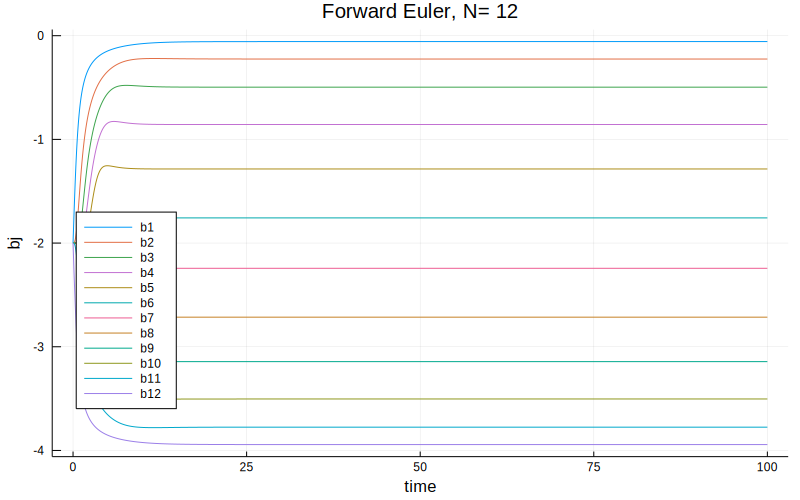

In [8]:
plot(t,b[1,:],label = "b1")
for i = 2:N-1
    nam = string("b",string(i))
    plot!(t,b[i,:],label = nam)
end
nam = string("b",string(N))
xlabel!("time")
ylabel!("bj")
title!(string("Forward Euler, N= ",string(N)))
display(plot!(t,b[N,:],label = nam,size = (800, 500),legend=:bottomleft))


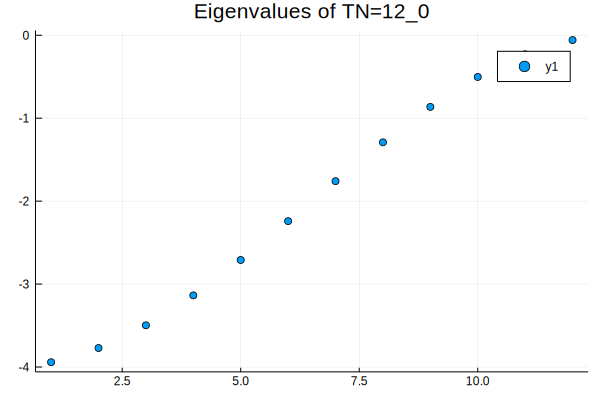

In [24]:
scatter(eigs)
title!("Eigenvalues of TN=12_0")

### 4th Order Runge Kutta 
with N = 6 and $b_j(0) = 0$ and $a_j(0) = \frac{1}{2} $ 

In [10]:

N = 6
T = 100 # Final time.
k = .01
n = convert(Int64,ceil(T/k))
t = zeros(n+1)
t[1]=0
b = zeros(N, n+1);
a = zeros(N-1, n+1);
b[:,1] = zeros(N);
a[:,1] = 0.5*ones(N-1);
T = SymTridiagonal(b[:,1],a[:,1])
eigs,evecs = eigen(T)
for i = 2:n+1
    S = Tridiagonal(-a[:,i-1],zeros(N),a[:,i-1])
    f = T -> S*T-T*S;
    t[i] = t[i-1] + k
    Y1 = T
    f1 = f(Y1)    
    Y2 = T + (k/2)*f1
    f2 = f(Y2)
    Y3 = T + (k/2)*f2
    f3 = f(Y3)
    Y4 = T + k*f3
    f4 = f(Y4)
    T = T + (k/6)*(f1+2*f2+2*f3+f4)
    b[:,i] = diag(T)
    a[:,i] = diag(T,1)
    S = Tridiagonal(-a[:,1],zeros(N),a[:,1])
end


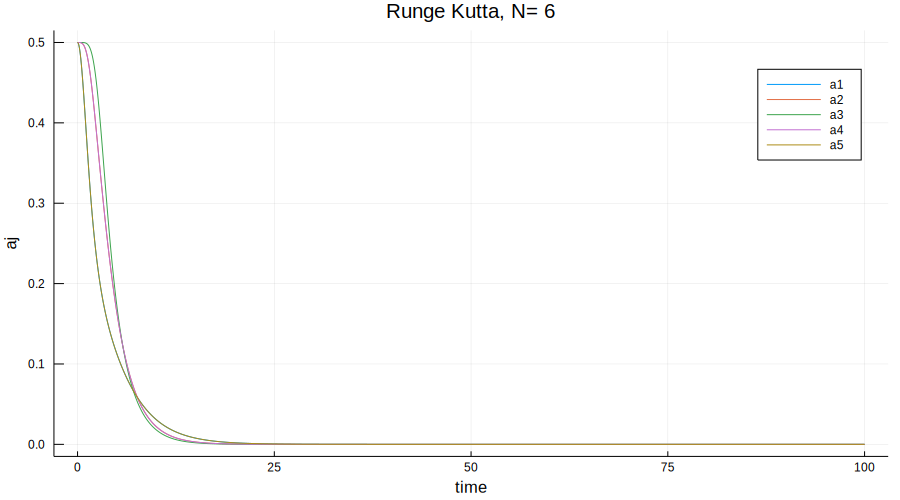

In [11]:
plot(t,a[1,:],label = "a1")
for i = 2:N-2
    nam = string("a",string(i))
    plot!(t,a[i,:],label = nam)
end
nam = string("a",string(N-1))
xlabel!("time")
ylabel!("aj")
title!(string("Runge Kutta, N= ",string(N)))
display(plot!(t,a[N-1,:],label = nam,size = (900, 500)))


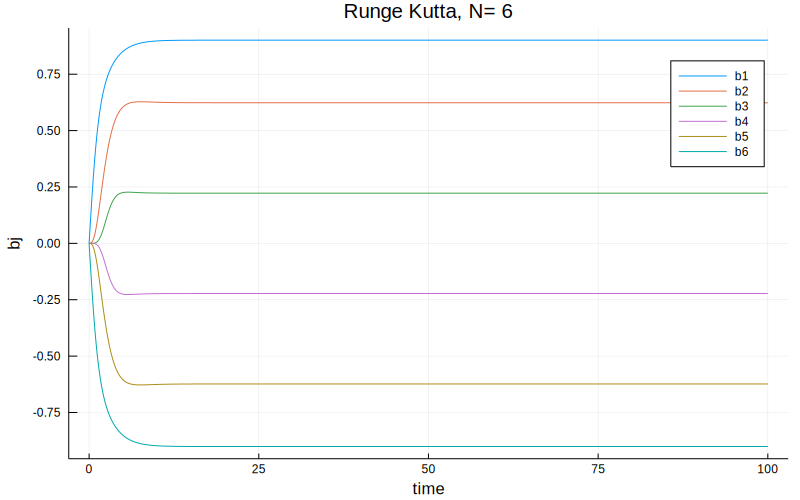

In [12]:
plot(t,b[1,:],label = "b1")
for i = 2:N-1
    nam = string("b",string(i))
    plot!(t,b[i,:],label = nam)
end
nam = string("b",string(N))
xlabel!("time")
ylabel!("bj")
title!(string("Runge Kutta, N= ",string(N)))
display(plot!(t,b[N,:],label = nam,size = (800, 500)))


## Problem 3: 

Implementatin to convert between a,b,p, and q

In [13]:
to_a = (p,q) -> .5*exp.(-(q[2:end]-q[1:end-1])/2) 
to_b = (p,q) -> -.5*p
to_p = (a,b) -> -2*b
function to_q(a,b) # chooses q[1] = 0
    q = fill(0.,length(b)) 
    q[2:end] = -2*log.(2*a)
    cumsum(q)
end

to_q (generic function with 1 method)

In [14]:
function J(q)
    out = fill(0.,length(q))
    temp = exp.(q[1:end-1] - q[2:end])
    out[1:end-1] -= temp
    out[2:end] += temp
    out
end
function K(p)
    p
end

K (generic function with 1 method)

### Störmer-Verlet 

In [15]:
N=6
k = 2^(-6)
n = convert(Int64,100/k)
t = zeros(n+1)
t[1]=0
b = zeros(N, n+1);
a = zeros(N-1, n+1);
b[:,1] = zeros(N);
a[:,1] = 0.5*ones(N-1);
p = zeros(N,n+1);
q = zeros(N,n+1)
p[:,1] = to_p(a[:,1],b[:,1])
q[:,1] = to_q(a[:,1],b[:,1])

for i = 2:n+1
    t[i] = t[i-1] + k
    p[:,i] = p[:,i-1] +(k/2)*J(q[:,i-1])
    q[:,i] = q[:,i-1]+k*K(p[:,i])
    p[:,i] = p[:,i]+(k/2)*J(q[:,i])
    a[:,i] = to_a(p[:,i],q[:,i])
    b[:,i] = to_b(p[:,i],q[:,i])
end


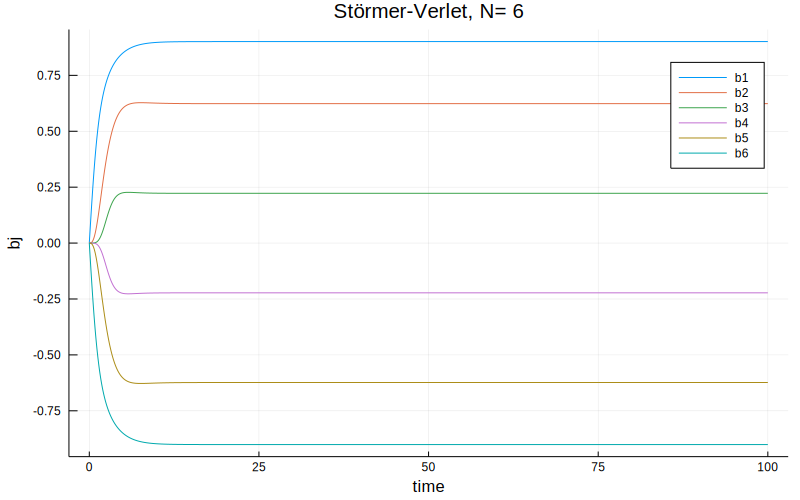

In [16]:
plot(t,b[1,:],label = "b1")
for i = 2:N-1
    nam = string("b",string(i))
    plot!(t,b[i,:],label = nam)
end
nam = string("b",string(N))
xlabel!("time")
ylabel!("bj")
title!(string("Störmer-Verlet, N= ",string(N)))
display(plot!(t,b[N,:],label = nam,size = (800, 500)))



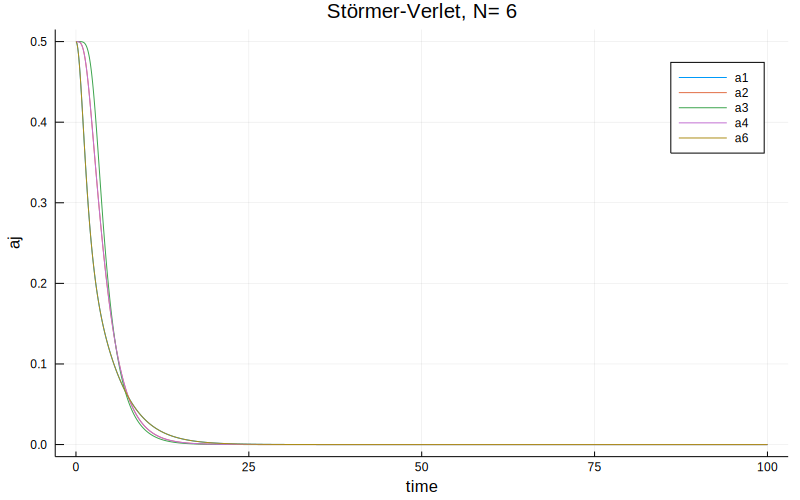

In [17]:
plot(t,a[1,:],label = "a1")
for i = 2:N-2
    nam = string("a",string(i))
    plot!(t,a[i,:],label = nam)
end
nam = string("a",string(N))
xlabel!("time")
ylabel!("aj")
title!(string("Störmer-Verlet, N= ",string(N)))
display(plot!(t,a[N-1,:],label = nam,size = (800, 500)))

### Convergence Study 

In [18]:
k = 2^(-6)
N=6
n = convert(Int64,100/k)
t = zeros(n+1)
t[1]=0
b = zeros(N, n+1);
a = zeros(N-1, n+1);
b[:,1] = zeros(N);
a[:,1] = 0.5*ones(N-1);
p = zeros(N,n+1);
q = zeros(N,n+1)
p[:,1] = to_p(a[:,1],b[:,1])
q[:,1] = to_q(a[:,1],b[:,1])

for i = 2:n+1
    t[i] = t[i-1] + k
    p[:,i] = p[:,i-1] +(k/2)*J(q[:,i-1])
    q[:,i] = q[:,i-1]+k*K(p[:,i])
    p[:,i] = p[:,i]+(k/2)*J(q[:,i])
    a[:,i] = to_a(p[:,i],q[:,i])
    b[:,i] = to_b(p[:,i],q[:,i])
end
atrue = a[:,n+1]
btrue = b[:,n+1]


6-element Array{Float64,1}:
  0.9009681866703794 
  0.6234874537746014 
  0.22251884236245786
 -0.22251884236245786
 -0.6234874537746014 
 -0.9009681866703794 

In [19]:
aapprox = zeros(5);
bapprox = zeros(5);
print(size(aapprox))
jvals = [5,4,3,2,1]
for j = 1:5
    k = 2.0^(-jvals[j])
    n = convert(Int64,100/k)
    t = zeros(n+1)
    t[1]=0
    b = zeros(N, n+1);
    a = zeros(N-1, n+1);
    b[:,1] = zeros(N);
    a[:,1] = 0.5*ones(N-1);
    p = zeros(N,n+1);
    q = zeros(N,n+1)
    p[:,1] = to_p(a[:,1],b[:,1])
    q[:,1] = to_q(a[:,1],b[:,1])

    for i = 2:n+1
        t[i] = t[i-1] + k
        p[:,i] = p[:,i-1] +(k/2)*J(q[:,i-1])
        q[:,i] = q[:,i-1]+k*K(p[:,i])
        p[:,i] = p[:,i]+(k/2)*J(q[:,i])
        a[:,i] = to_a(p[:,i],q[:,i])
        b[:,i] = to_b(p[:,i],q[:,i])
    end
    aapprox[j] = norm(a[:,n+1]-atrue)
    bapprox[j] = norm(b[:,n+1]-btrue)
    if j > 1 
        println("Error reduction ratio a ",aapprox[j]/aapprox[j-1])
        println("Error reduction ratio b ",bapprox[j]/bapprox[j-1])
    end
end
    

(5,)Error reduction ratio a 5.003119180847775
Error reduction ratio b 5.004373667590925
Error reduction ratio a 4.210418508497765
Error reduction ratio b 4.214793382315254
Error reduction ratio a 4.086837471396729
Error reduction ratio b 4.106216033838947
Error reduction ratio a 4.153618518510122
Error reduction ratio b 4.274062623228083
